<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook, se presentará la consigna a seguir para el segundo práctico de la materia Exploración y Curación. El objetivo consiste en identificar e implementar los pasos necesarios para la limpieza de la base de datos de pobreza en hogares de Costa Rica, así como también analizar cruces de datos con mayor profundidad y validando el sentido lógico. Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [193]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Curación y Exploración del Dataset

### I. Rutina de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente __[checklist](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning)__ para la limpieza de los datos de nuestro proyecto. Esta _checklist_ es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue la _checklist_ y que deberán ir completando.

**Cada decisión tomada deberá quedar registrada de manera explícita y clara.** Luego de pasar por todos los puntos de la _checklist_ propuesta, deberán almacenar en un nuevo archivo los datos resultantes. Adicionalmente, deben tener en cuenta que las acciones de limpieza que realicen sobre este dataset también deberán ser implementadas sobre el dataset de test (que, por el momento, no ha sido disponibilizado).

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes, ya que éstas están relacionadas a decisiones que adoptaremos más adelante, como por ejemplo, sobre si es necesario crear nuevas features y si incluirlas o no. Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Análisis en Profundidad del Contenido

Una vez aplicada la _Checklist_, lo que vamos a hacer es profundizar aún más el análisis y tomar decisiones que se consideren pertinentes, si es que no lo han hecho aún en el desarrollo del primer apartado. Por supuesto, se deberán registrar todas las decisiones que tomen al respecto.

Al finalizar con el práctico, las preguntas listadas a continuación deberán quedar respondidas, mientras que si ya lo hicieron durante el desarrollo de la ´checklist´, el objetivo es que se replanteen las decisiones tomadas al respecto:

1. Hay tres features que, por su descripción, deberían ser numéricas: `dependency`, `edjefe` y `edjefa`. Sin embargo, el tipo de dato de estos campos es 'Objeto'. Obtener los valores únicos, analizar por qué no son numéricos y decidir cómo se transformarán a numéricos, teniendo en cuenta su significado.

2. Comparar los campos `tamhog` y `hhsize`. ¿Qué información nos da cada una? ¿Qué deberíamos hacer al respecto? ¿Qué diferencia hay con el campo `r4t3`?

3. ¿Qué ocurre con las rentas (`v2a1`) outliers? ¿Son razonables? ¿Mantenemos o descartamos estos registros?

4. ¿Para qué casos de las variables TipoVivienda (`tipovivi`) no existe renta? ¿Es un si y solo si? Es decir, por ejemplo, si son propietarios, nunca hay valor en el campo renta, mientras que si no lo son, siempre hay valor. En caso de que esto no sea así, ¿es razonable? ¿Qué decisión tomarían al respecto?

5. ¿Qué decidieron respecto a los valores faltantes de la renta? Una **propuesta que podría considerarse interesante** es completar tales valores faltantes con el **costo de oportunidad** de los propietarios de ese hogar. Es decir, ese hogar está dejando de percibir una renta igual a $x$ por estar habitando esa vivienda. Por lo tanto, ese costo de oportunidad puede estimarse de acuerdo al valor de la renta de viviendas similares, en base a múltiples criterios, como por ejemplo: zona, región, tipo de construcción, acceso a servicios y todas las características que ustedes consideren pertinentes. Esto quedará a su criterio. ¿Cuál es el único feature que no deberíamos usar para obtener el costo de oportunidad y por qué?

6. ¿Qué datos se repiten para `idhogar` y cuáles no? ¿Tiene sentido?

7. Si contamos la cantidad de individuos entrevistados por hogar, ¿coincide con el tamaño del hogar? ¿Y coincide con la suma de las variables que indican cantidad de personas? ¿Qué se puede hacer en los casos en que no?

8. Considerando los campos `rooms` y `bedrooms`, debería haber al menos tantos ambientes como habitaciones o bien más. Comprobar si esto es así efectivamente. Si no lo fuera, ¿puede ser un error de carga? ¿Cómo lo solucionarían?

9. ¿Todos los `idhogar` tienen jefa o jefe de hogar? (`parentesco1` == 1) Si esto no ocurre, ¿qué harían con los hogares que no tienen?

Esta lista es extensa e intenta abarcar todas las posibles irregularidades en los datos, pero puede no ser exhaustiva. **Cualquier análisis adicional de consistencia que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.**

### Entregables

El entregable de este práctico consiste en esta misma Notebook, pero con la _checklist_ realizada y el análisis de contenido completo, explicando las decisiones tomadas en cada etapa. Además, deberán elaborar un script que contenga una función para curar nuevos datos con la misma estructura. Finalmente, deberán actualizar la metadata.

# Resolución

## I. Rutina de Curación

### 1. Importación de Datos

### 1.1. Verificación de Inexistencia de Problemas en la Importación

Para comenzar, importamos los datos que vamos a procesar:

In [3]:
# Cargamos el Dataset original en una variable
# url = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.txt'
url_data = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data)
_ds.head(15)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.00,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.00,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.00,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.00,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.00,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.00,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.00,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,

In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo
url_fields_info = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/Dataset%20Fields.txt'
_data_fields = pd.read_csv(url_fields_info, sep='\t', encoding = 'cp1252')
_data_fields

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Recuerden que la variable `Target` constituye nuestro objetivo de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habitan, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [5]:
# Eliminamos columnas que son features calculadas en base a otros features
_calc_feat = _ds.loc[:,'SQBescolari':'agesq'].columns
print('Columnas eliminadas: ', _calc_feat.values)
#_ds.drop(columns = _calc_feat, inplace = True)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']


Tomamos una muestra aleatoria para ver valores más dispersos.

In [6]:
# Fijar seed para asegurar reproducibilidad
np.random.seed(0)
_ds.sample(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
4319,ID_c9fdb7266,NaN,0,6,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c92ca11d1,1,3,0,4,.33333334,no,6,9.333333,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,0,0,1,1,1,1,4,1,0,0,0,0,0,1,0,25,121,625,16,0,1,1.777778,0.111111,87.111107,625,4
3883,ID_fd6cc8def,NaN,0,4,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72524240f,0,2,0,2,no,no,14,14.000000,0,0,0,0,0,0,0,1,0,2,1.000000,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,57,196,3249,4,0,0,1.000000,0.000000,196.000000,3249,4
3775,ID_85d5cd65c,180000.0,0,4,0,1,1,1,2.0,1,1,2,1,1,2,2,2,4,4,4,15,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,006031de3,2,2,0,4,yes,15,no,15.500000,0,0,0,0,0,0,0,1,0,2,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,39,225,1521,16,225,4,4.000000,1.000000,240.250000,1521,4
1519,ID_c230376ae,NaN,0,5,0,1,1,1,2.0,0,1,1,1,1,2,1,2,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c0480739d,2,1,0,3,2,no,16,28.000000,0,0,0,0,0,0,1,0,0,3,1.000000,1,0,0,0,0,0,1,1,3,1,0,0,0,0,0,1,0,19,144,361,9,0,4,1.000000,4.000000,784.000000,361,4
8810,ID_991b84866,NaN,0,4,0,1,1,0,NaN,1,1,2,1,1,2,2,2,4,4,4,5,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,a8dcd4364,2,2,0,4,yes,9,no,9.500000,0,1,0,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,4,0,0,0,0,0,1,1,0,11,25,121,16,81,4,4.000000,1.000000,90.250000,121,2
4398,ID_6846cbaac,NaN,0,6,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,6,NaN,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3677a8765,0,4,3,4,3,no,6,4.500000,0,0,1,0,0,0,0,0,0,3,1.333333,1,0,0,0,0,0,1,1,3,1,0,0,0,0,0,1,0,33,36,1089,16,0,0,1.777778,9.000000,20.250000,1089,4
6632,ID_af3dd1bd2,NaN,0,7,0,1,1,1,1.0,0,0,0,1,2,3,1,2,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,351a9fd58,1,2,1,3,2,no,6,9.000000,0,0,0,0,0,0,1,0,0,3,1.000000,1,0,0,0,0,0,1,1,2,0,0,1,0,0,0,1,0,51,144,2601,9,0,1,1.000000,4.000000,81.000000,2601,3
5790,ID_b6889eed0,NaN,0,3,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3

Veamos los tipos de datos que tenemos

In [7]:
_ds.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
paredother           int64
pisomoscer           int64
pisocemento          int64
pisoother            int64
pisonatur            int64
pisonotiene          int64
pisomadera           int64
t

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 1.2. Asegurar la Existencia de IDs o Claves Únicas

El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

In [8]:
dup =_ds[_ds.duplicated(['Id'], keep='first')].shape[0]
print('Cantidad de Id duplicados: {}'.format(dup))

Cantidad de Id duplicados: 0


El identificador de personas es único.

### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que los mismos ya se encuentran despersonalizados.

### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

## 2. Pasos de Limpieza Necesarios

### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Antes que nada, verificar el encoding de la fuente de datos, leyendo en crudo los primeros 100000 caracteres, por ejemplo:

In [9]:
import chardet

In [10]:
import requests
rawdata = requests.get(url_data)
result = chardet.detect(rawdata.content[:100000])
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

Analizar los nombres de columnas, utilizando por ejemplo `_ds.columns.str.extract(r'^(\w+)$')`.

In [11]:
_ds.columns.values.shape

(143,)

In [12]:
_ds.columns.str.extract(r'^(\w+)$').shape

(143, 1)

### 2.2. Tratamiento de Valores Faltantes

Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total:

In [13]:
valores_faltantes = pd.DataFrame([_ds.isnull().sum(),
                                   _ds.isnull().sum()/len(_ds)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total
v2a1,6860,71.78%
v18q1,7342,76.82%
rez_esc,7928,82.95%
meaneduc,5,0.05%
SQBmeaned,5,0.05%


In [14]:
_ds['v2a1'].fillna(0)
_ds['v18q1'].fillna(0)
_ds['rez_esc'].fillna(0)
_ds['meaneduc'].fillna(0)

0       10.000000
1       12.000000
2       11.000000
3       11.000000
4       11.000000
5       11.000000
6       11.000000
7       10.000000
8       10.000000
9       10.000000
10      10.000000
11      23.000000
12      23.000000
13       9.500000
14       9.500000
15      17.000000
16      17.000000
17      17.000000
18      17.000000
19      13.500000
20      13.500000
21      10.000000
22      10.000000
23      10.333333
24      10.333333
25      10.333333
26      15.000000
27       6.666666
28       6.666666
29       6.666666
30       9.500000
31       9.500000
32       5.250000
33       5.250000
34       5.250000
35       5.250000
36       5.250000
37       7.000000
38       7.000000
39       7.000000
40      11.000000
41      11.000000
42      15.500000
43      15.500000
44      15.500000
45      10.000000
46      10.000000
47      13.500000
48      13.500000
49      13.500000
50      11.000000
51      11.000000
52      11.000000
53      11.000000
54       9.000000
55       9

### 2.3. Codificación de Variables Categóricas

Aplica?

El dataset contiene variables categóricas como lo es el tipo de vivienda, estado civil, material del techo, de la pared, entre otros. Están en un formato codificado, ya que cada categoría está representada por una combinación única de columnas representadas con 1 y 0, por ejemplo tipovivi1, tipovivi2, tipovivi3, tipovivi4, tipovivi5.

### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

No aplica

### 2.5. Verificación de Consistencia de Datos

Este es el paso más analítico, en donde se deben aplicar reglas de integridad.

In [15]:
_ds.describe(include='all').round(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2697.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,2215.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,1629.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557,9557.00,9557.00,9557.00,9557.00,9557,9557,9557,9552.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.0,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9557.00,9552.00,9557.00,9557.00
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_5ca05aeba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Realizando un primer análisis sobre la descripción de los features disponibles observamos las siguientes afirmaciones de integridad:
- Los features binarios tienen un valor máximo de 1.
- El Id tiene todos sus valores únicos, con frecuencia de repetición igual a 1.
- No existen valores negativos.
- La edad máxima es de 97.
- Existen 4 Targets y todos los registros poseen uno asociado.

In [16]:
cols = _ds.columns.str.extractall(r'^(Id|meaneduc|dis|estadocivil.|parentesco..?|instlevel.|escolari|rez_esc|f?e?male|age)$')
cols = cols[0].tolist()
print(cols)

['Id', 'escolari', 'rez_esc', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12', 'meaneduc', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'age']


In [17]:
_ds_hogar = _ds.drop(cols, axis=1)
print('Features del individuo:\t{}\nFeatures del hogar:\t{}'.format(
    _ds.columns.shape[0] - _ds_hogar.columns.shape[0],
    _ds_hogar.columns.shape[0]))

Features del individuo:	36
Features del hogar:	107


Generamos el DataFrame `_ds_hogar` que contiene únicamente features pertenecientes al hogar. Esto quiere decir que si agrupásemos por todas estas características obtendremos un registro agrupado por hogar. En caso que un hogar posea más de un registro, querrá decir que los datos del hogar no son consistentes, ya que todos deberían compartir los mismos. Si ese fuera el caso, se debería analizar el o los tipos de variables inconsistentes para proceder a curarles si correspondiese.

In [18]:
_ds_grouped =_ds_hogar.groupby(_ds_hogar.columns.tolist()).size().reset_index(name='count')

In [19]:
cant_dup =_ds_grouped[_ds_grouped.duplicated('idhogar',keep=False)].sort_values('idhogar').shape[0]
print('Cantidad de registros duplicados: {}'.format(cant_dup))

Cantidad de registros duplicados: 742


A partir de este resultado, podemos afirmar que todos los integrantes de cada hogar del dataset poseen los mismos valores para las columnas que caracterizan al hogar, afirmando entonces la consistencia de los mismos. 

In [20]:
categorical_cols = ['estadocivil.','instlevel.','tipovivi.',
                    'lugar.','area.','parentesco..?','estadocivil.',
                    'eviv.','epared.','etecho.','elimbasu.',
                    'energcocinar.','sanitario.', 'pared.\w*',
                    'piso.\w*', 'techo.\w*', 'abastagua.\w*']

In [21]:
def check_integrity(col_regx):
    columns = _ds.columns.str.extractall(r'^({})$'.format(col_regx))[0].values.tolist()
    grouped = _ds.groupby(columns).count().shape[0]
    return len(columns) + 1, grouped, len(columns) + 1 >= grouped

for col in categorical_cols[1:]:
    int_check = check_integrity(col)
    print('Cant columnas: {}\t-\t Combinaciones: {}\t-\t Integridad: {}'.format(int_check[0],int_check[1],int_check[2]))

Cant columnas: 10	-	 Combinaciones: 10	-	 Integridad: True
Cant columnas: 6	-	 Combinaciones: 5	-	 Integridad: True
Cant columnas: 7	-	 Combinaciones: 6	-	 Integridad: True
Cant columnas: 3	-	 Combinaciones: 2	-	 Integridad: True
Cant columnas: 13	-	 Combinaciones: 12	-	 Integridad: True
Cant columnas: 8	-	 Combinaciones: 7	-	 Integridad: True
Cant columnas: 4	-	 Combinaciones: 3	-	 Integridad: True
Cant columnas: 4	-	 Combinaciones: 3	-	 Integridad: True
Cant columnas: 4	-	 Combinaciones: 3	-	 Integridad: True
Cant columnas: 7	-	 Combinaciones: 5	-	 Integridad: True
Cant columnas: 5	-	 Combinaciones: 4	-	 Integridad: True
Cant columnas: 6	-	 Combinaciones: 5	-	 Integridad: True
Cant columnas: 9	-	 Combinaciones: 8	-	 Integridad: True
Cant columnas: 7	-	 Combinaciones: 6	-	 Integridad: True
Cant columnas: 5	-	 Combinaciones: 5	-	 Integridad: True
Cant columnas: 4	-	 Combinaciones: 3	-	 Integridad: True


Todas las validaciones de integridad sobre los features categóricos codificados son positivas.

### 2.6. Identificar y Documentar Valores Atípicos/Outliers

Este análisis esta asociado a las variables numéricas, por lo que iremos una a una, viendo cuales son sus valores atípicos. 
Si la variable describe al hogar en vez de al individuo la analizaremos una sola vez por hogar ya que la cantidad de integrantes del hogar (de entrevistados, registros del dataset) va a influir en la categorización de típico/atípico. Como va validamos que los valores son los mismos para un mismo hogar, es indistinto qué registro elegir. En este caso tomaremos el del jefe de hogar.
Para algunas variables como r4h3, r4t1 o similares decidimos evaluarlas sobre el total de personas ya que esas cantidades podría ser consideradas grandes o chicas según la cantidad de integrantes del hogar.
Decidimos usar el criterio de 1.5 * IQR.
En esta instancia NO eliminaremos los registros con outliers porque el dataset es bastante pequeño, pero es importante tenerlos presentes para efectuar análisis y comparaciones en las instancias siguientes ya que estos valores atípicos puede influir notoriamente en los resultados. Lo ideal sería eliminarlos provisoriamente para el análisis en particular que quiera hacerse.

In [22]:
_ds_jef =_ds[_ds['parentesco1'] == 1]

In [23]:
_ds_jef.shape

(2973, 143)

#### v2a1

Outliers: gráfico

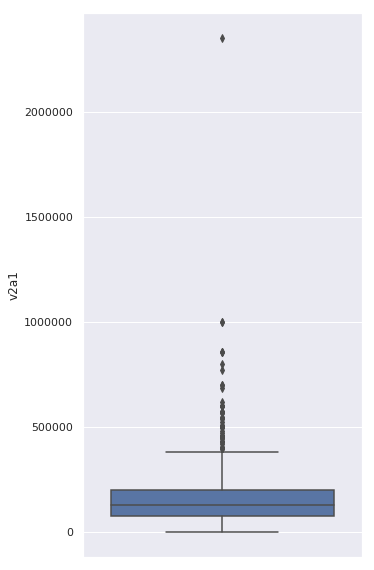

In [24]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='v2a1', hue='Target')

Outliers: conteo

In [25]:
Q1 = _ds_jef.v2a1.quantile(1/4)
Q3 = _ds_jef.v2a1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.v2a1 <= Q1 - 1.5*IQR) | (_ds_jef.v2a1 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para v2a1')

Bajo el criterio de 1.5 * IQR encontramos 63 outliers para v2a1


Outliers: listado

In [26]:
_ds_jef[is_outlier].sort_values(by=['v2a1']).v2a1.value_counts().sort_index()

399378.0     4
400000.0     8
420000.0     1
427905.0     2
432000.0     1
450000.0     3
456432.0     5
470000.0     1
480000.0     1
500000.0     7
510000.0     1
525000.0     1
540000.0     1
542013.0     1
550000.0     1
564834.0     1
570540.0     7
600000.0     5
620000.0     1
684648.0     1
700000.0     2
770229.0     1
800000.0     1
855810.0     3
1000000.0    2
2353477.0    1
Name: v2a1, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [27]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 63 outliers (2,12%).

#### v18q1

Outliers: gráfico

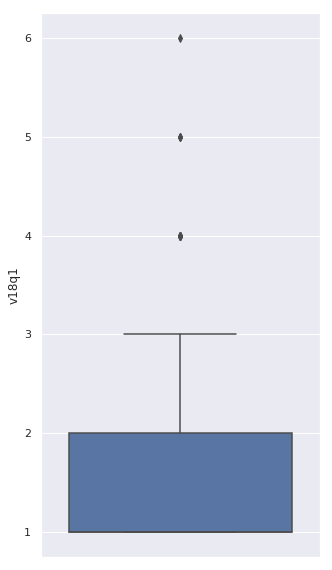

In [28]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='v18q1')

Outliers: conteo

In [29]:
Q1 = _ds_jef.v18q1.quantile(1/4)
Q3 = _ds_jef.v18q1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.v18q1 <= Q1 - 1.5*IQR) | (_ds_jef.v18q1 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para v18q1')

Bajo el criterio de 1.5 * IQR encontramos 13 outliers para v18q1


Outliers: listado

In [30]:
_ds_jef[is_outlier].sort_values(by=['v18q1']).v18q1.value_counts().sort_index()

4.0    9
5.0    3
6.0    1
Name: v18q1, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [31]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 13 outliers (0,44%).

#### tamhog

Outliers: gráfico

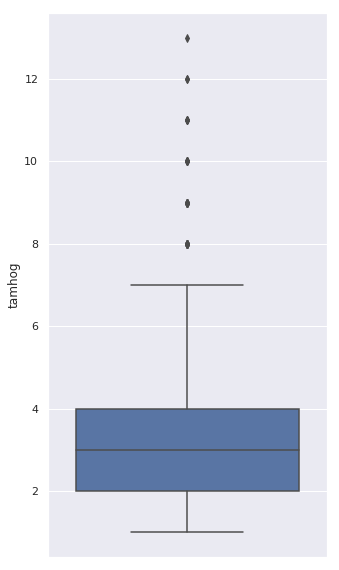

In [32]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='tamhog')

Outliers: conteo

In [33]:
Q1 = _ds_jef.tamhog.quantile(1/4)
Q3 = _ds_jef.tamhog.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.tamhog <= Q1 - 1.5*IQR) | (_ds_jef.tamhog >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para tamhog')

Bajo el criterio de 1.5 * IQR encontramos 87 outliers para tamhog


Outliers: listado

In [34]:
_ds_jef[is_outlier].sort_values(by=['tamhog']).tamhog.value_counts().sort_index()

7     52
8     12
9     10
10     6
11     4
12     2
13     1
Name: tamhog, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [35]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 87 outliers (2,93%).

#### tamviv

Outliers: gráfico

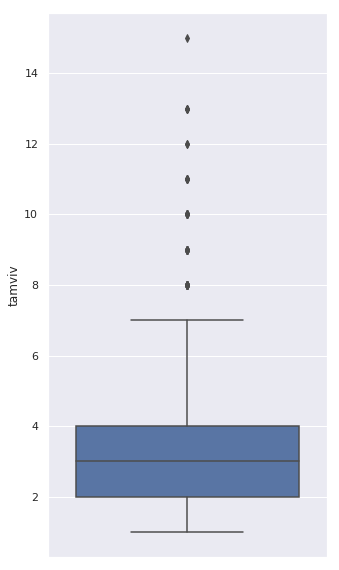

In [36]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='tamviv')

Outliers: conteo

In [37]:
Q1 = _ds_jef.tamviv.quantile(1/4)
Q3 = _ds_jef.tamviv.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.tamviv <= Q1 - 1.5*IQR) | (_ds_jef.tamviv >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para tamviv')

Bajo el criterio de 1.5 * IQR encontramos 112 outliers para tamviv


Outliers: listado

In [38]:
_ds_jef[is_outlier].sort_values(by=['tamviv']).tamviv.value_counts().sort_index()

7     61
8     17
9     12
10     9
11     6
12     2
13     4
15     1
Name: tamviv, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [39]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 112 outliers (3,77%).

#### escolari

Outliers: gráfico

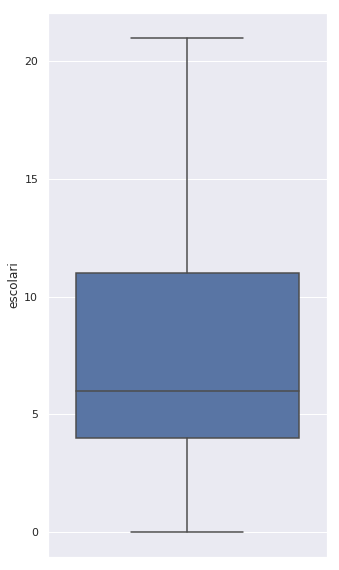

In [40]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds, y='escolari')

Resumen: NO hay Outliers

#### rez_esc

Outliers: gráfico

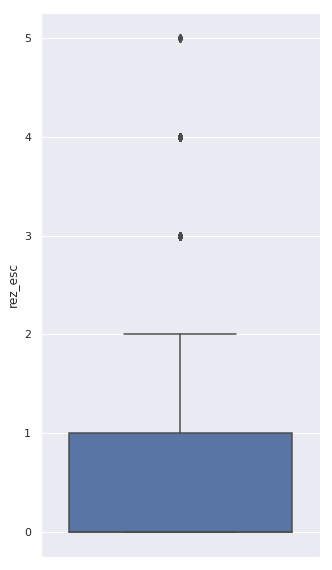

In [41]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds, y='rez_esc')

Outliers: conteo

In [42]:
Q1 = _ds.rez_esc.quantile(1/4)
Q3 = _ds.rez_esc.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds.rez_esc <= Q1 - 1.5*IQR) | (_ds.rez_esc >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para rez_esc')

Bajo el criterio de 1.5 * IQR encontramos 93 outliers para rez_esc


Outliers: listado

In [43]:
_ds[is_outlier].sort_values(by=['rez_esc']).rez_esc.value_counts().sort_index()

3.0    55
4.0    29
5.0     9
Name: rez_esc, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [44]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 9557 individuos (100%), encontramos 93 outliers (0,97%).

#### hhsize

Outliers: gráfico

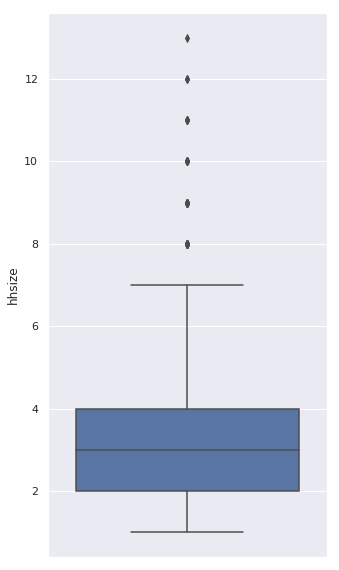

In [45]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='hhsize')

Outliers: conteo

In [46]:
Q1 = _ds_jef.hhsize.quantile(1/4)
Q3 = _ds_jef.hhsize.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.hhsize <= Q1 - 1.5*IQR) | (_ds_jef.hhsize >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para hhsize')

Bajo el criterio de 1.5 * IQR encontramos 87 outliers para hhsize


Outliers: listado

In [47]:
_ds_jef[is_outlier].sort_values(by=['hhsize']).hhsize.value_counts().sort_index()

7     52
8     12
9     10
10     6
11     4
12     2
13     1
Name: hhsize, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [48]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 87 outliers (2,93%).

#### meaneduc

Outliers: gráfico

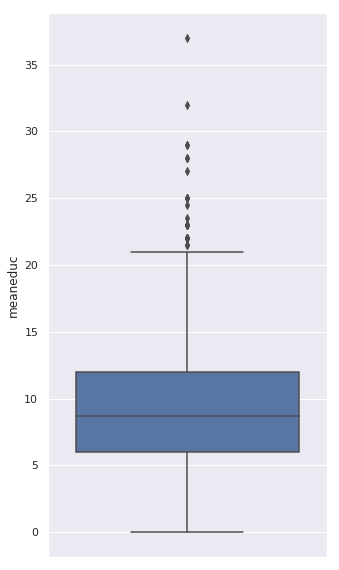

In [49]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='meaneduc')

Outliers: conteo

In [50]:
Q1 = _ds_jef.meaneduc.quantile(1/4)
Q3 = _ds_jef.meaneduc.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.meaneduc <= Q1 - 1.5*IQR) | (_ds_jef.meaneduc >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para meaneduc')

Bajo el criterio de 1.5 * IQR encontramos 36 outliers para meaneduc


Outliers: listado

In [51]:
_ds_jef[is_outlier].sort_values(by=['meaneduc']).meaneduc.value_counts().sort_index()

21.0    11
21.5     2
22.0     6
23.0     5
23.5     1
24.5     1
25.0     3
27.0     1
28.0     2
29.0     2
32.0     1
37.0     1
Name: meaneduc, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [52]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 36 outliers (1,21%).

#### overcrowding

Outliers: gráfico

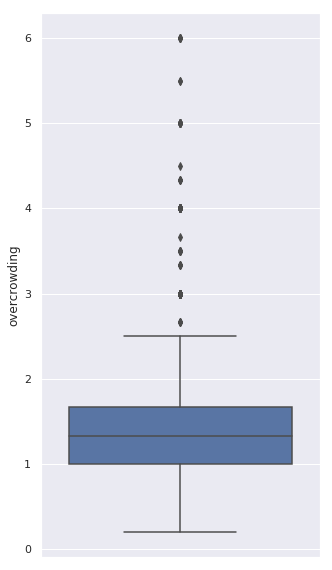

In [53]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='overcrowding')

Outliers: conteo

In [54]:
Q1 = _ds_jef.overcrowding.quantile(1/4)
Q3 = _ds_jef.overcrowding.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.overcrowding <= Q1 - 1.5*IQR) | (_ds_jef.overcrowding >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para overcrowding')

Bajo el criterio de 1.5 * IQR encontramos 164 outliers para overcrowding


Outliers: listado

In [55]:
_ds_jef[is_outlier].sort_values(by=['overcrowding']).overcrowding.value_counts().sort_index()

2.666667     4
3.000000    99
3.333333     4
3.500000     6
3.666667     1
4.000000    25
4.333334     4
4.500000     1
5.000000    12
5.500000     2
6.000000     6
Name: overcrowding, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [56]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: De un total de 2973 hogares (100%), encontramos 164 outliers (5,52%).

#### age

Outliers: gráfico

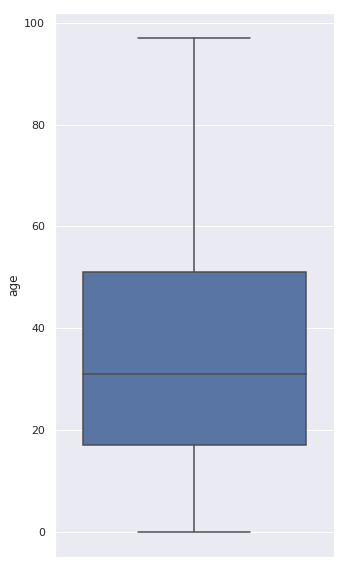

In [57]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds, y='age')

Resumen: NO hay Outliers

#### r4h3/r4t3

In [58]:
_ds_jef['r4h3_r4t3'] = _ds_jef['r4h3'].div(_ds_jef['r4t3'])

Outliers: gráfico

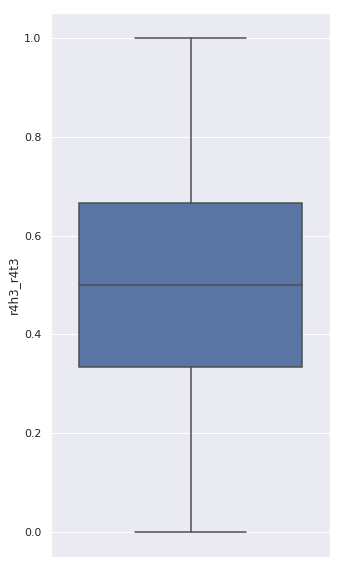

In [59]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='r4h3_r4t3')

Resumen: NO hay Outliers

#### r4m3/r4t3

In [60]:
_ds_jef['r4m3_r4t3'] = _ds_jef['r4m3'].div(_ds_jef['r4t3'])

Outliers: gráfico

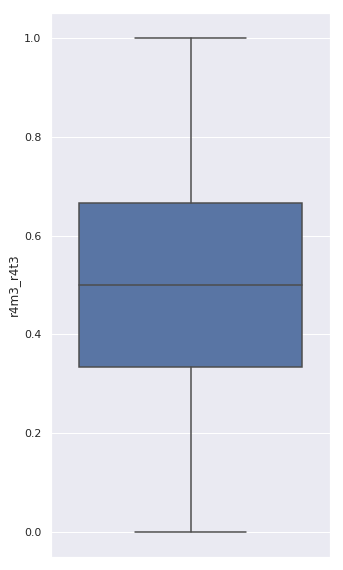

In [61]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='r4m3_r4t3')

Resumen: NO hay Outliers

#### hogar_nin/r4t3

In [62]:
_ds_jef['hogar_nin_r4t3'] = _ds_jef['hogar_nin'].div(_ds_jef['r4t3'])

Outliers: gráfico

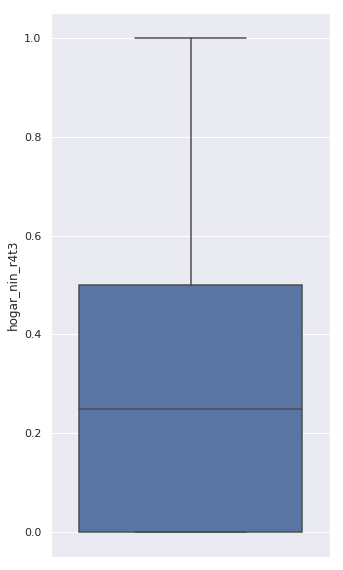

In [63]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='hogar_nin_r4t3')

Resumen: NO hay Outliers

#### hogar_adul/r4t3

In [64]:
_ds_jef['hogar_adul_r4t3'] = _ds_jef['hogar_adul'].div(_ds_jef['r4t3'])

Outliers: gráfico

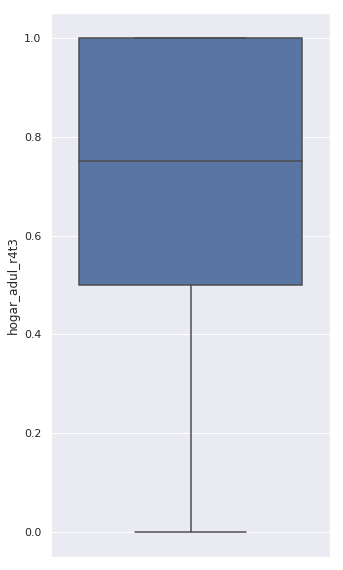

In [65]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='hogar_adul_r4t3')

Resumen: NO hay Outliers

#### hogar_mayor/r4t3

In [66]:
_ds_jef.shape

(2973, 147)

In [67]:
_ds_jef['hogar_mayor_r4t3'] = _ds_jef['hogar_mayor'].div(_ds_jef['r4t3'])

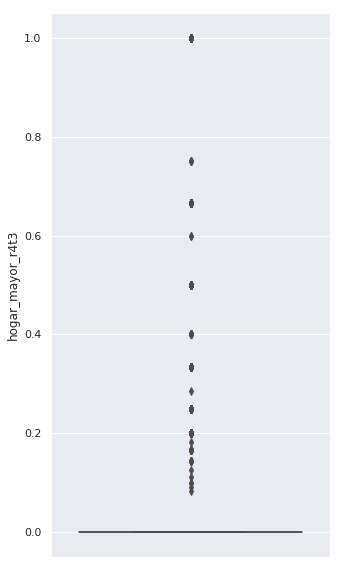

In [68]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='hogar_mayor_r4t3')

Outliers: conteo

In [69]:
Q1 = _ds_jef.hogar_mayor_r4t3.quantile(1/4)
Q3 = _ds_jef.hogar_mayor_r4t3.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.hogar_mayor_r4t3 <= Q1 - 1.5*IQR) | (_ds_jef.hogar_mayor_r4t3 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para hogar_mayor_r4t3')

Bajo el criterio de 1.5 * IQR encontramos 2973 outliers para hogar_mayor_r4t3


Outliers: listado

In [70]:
_ds_jef[is_outlier].sort_values(by=['hogar_mayor_r4t3']).hogar_mayor_r4t3.value_counts().sort_index()

0.000000    2249
0.083333       1
0.090909       1
0.100000       2
0.111111       1
0.125000       1
0.142857       9
0.166667      18
0.181818       1
0.200000      42
0.250000      60
0.285714       1
0.333333     102
0.400000      12
0.500000     181
0.600000       2
0.666667      58
0.750000       5
1.000000     227
Name: hogar_mayor_r4t3, dtype: int64

De esta manera podríamos eliminar los outliers si así lo decidiéramos.

In [71]:
#_ds.drop(is_outlier.index, inplace = True)

Resumen: NO hay valores típicos diferentes de 0

### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

Todas los feature categóricos, como tipo de vivienda, tipo de hogar, estado civil, entre otros, podríamos unificarlos en un único feature agrupándolos y generando variables binarizadas.

In [72]:
types = _ds.dtypes.head(10)
size =_ds.memory_usage().sum() / 1024**2 
print('Types: {}\n\nSize: {} Mb.'.format(types,size.round(3)))

Types: Id         object
v2a1      float64
hacdor      int64
rooms       int64
hacapo      int64
v14a        int64
refrig      int64
v18q        int64
v18q1     float64
r4h1        int64
dtype: object

Size: 10.427 Mb.


In [73]:
_ds_reduced = _ds
for col in _ds.columns:
    _ds_reduced[col]= pd.to_numeric(_ds[col],downcast='unsigned',errors='ignore')
types = _ds_reduced.dtypes.head(10)
size = _ds_reduced.memory_usage().sum() / 1024**2 
print('Types: {}\n\nSize: {} Mb.'.format(types,size.round(3)))

Types: Id         object
v2a1      float64
hacdor      uint8
rooms       uint8
hacapo      uint8
v14a        uint8
refrig      uint8
v18q        uint8
v18q1     float64
r4h1        uint8
dtype: object

Size: 2.169 Mb.


### 2.8. Guardar el Set de Datos con un Nombre Informativo

In [74]:
#pd.to_csv('./PobrezaCostaRica_depurado.csv')

## 3. Pasos de Limpieza Deseables

### 3.1. Ordenar Variables/Columnas

In [75]:
_ds.columns.values

array(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig',
       'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3',
       'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc',
       'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
       'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
       'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
       'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
       'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
       'abastaguano', 'public', 'planpri', 'noelec', 'coopele',
       'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
       'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
       'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
       'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2',
       'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2',
       'eviv3', 'dis', 'male', 'female', '

In [76]:
ind_cols = ['Id','female','age', 'male','dis','estadocivil1', 'estadocivil2',
            'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6',
            'estadocivil7','parentesco1', 'parentesco2', 'parentesco3',
            'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7',
            'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11',
            'parentesco12','escolari','rez_esc','meaneduc','instlevel1', 
            'instlevel2','instlevel3', 'instlevel4', 'instlevel5', 'instlevel6',
            'instlevel7', 'instlevel8', 'instlevel9']
habitantes_cols = ['v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3',
                   'r4t1', 'r4t2', 'r4t3','tamviv','dependency','edjefe', 'edjefa']
hogar_cols = ['idhogar','v2a1', 'hogar_nin', 'hogar_adul',
               'hogar_mayor', 'hogar_total','hacdor', 'rooms', 'hacapo', 'v14a', 'refrig','tamhog',
               'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
               'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
               'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
               'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
               'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
               'abastaguano','public', 'planpri', 'noelec', 'coopele',
               'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
               'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
               'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
               'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2',
               'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2',
               'eviv3','bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2',
               'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television',
               'mobilephone', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3',
               'lugar4', 'lugar5', 'lugar6', 'area1', 'area2','Target']
initial_cols = len(_ds.columns)
sorted_cols = len(_ds[ind_cols + habitantes_cols + hogar_cols].columns)
print('Cantidad de columnas sin ordenar: {}\nCantidad de columnas ordenadas: {}'.format(initial_cols,sorted_cols))

Cantidad de columnas sin ordenar: 143
Cantidad de columnas ordenadas: 134


De este modo logramos reaordenas las columnas ubucando en primer lugar a los features del individuo, luego a características generales sobre los sujetos que habitan la vivienda y finalmente datos de la viviendad.

### 3.2. Quitar Variables/Columnas Irrelevantes

Tenemos alguna en este caso?

In [77]:
def get_categorical_cols(col_regx):
    return _ds.columns.str.extractall(r'^({})$'.format(col_regx))[0].values.tolist()

cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe','SQBhogar_nin', 
        'SQBovercrowding','SQBdependency', 'SQBmeaned','agesq']
dropped_cols = []
for col in cols:
    dropped_cols += get_categorical_cols(col)

_ds.drop(dropped_cols,axis=1)

Eliminamos columnas que son calculadas en base a otras existenes.
En principio, estas variables no aportarían información extra que las variables "crudas", o sin operar.

### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.
Sugiero darles nombres más informativos a algunas columnas, como por ejemplo la de Renta Mensual y las de lugares. Como ayuda, sigue el diccionario de las columnas `lugar` con su nuevo nombre haciendo referencia directa a la región:

In [78]:
_col_dict = {'v2a1': 'Renta',
             'age': 'Edad',
             'escolari': 'Edad',
             'rez_esc': 'Edad',
             'meaneduc': 'Edad',
             'hacdor': 'Exceso_habitaciones',
             'rooms': 'Habitaciones',
             'v14a': 'Tiene_baño',
             'tamhog': 'Tamaño_hogar_tamhog',
             'hhsize': 'Tamaño_hogar_hhsize',
             'v18q': 'Tiene_tablet',
             'v18q1': 'Cant_tablets',
             'r4h1': 'Cant_hom_menores_12',
             'r4h2': 'Cant_hom_mayores_12',
             'r4h3': 'Total_hombres',
             'r4m1': 'Cant_muj_menores_12',
             'r4m2': 'Cant_muj_mayores_12',
             'r4m3': 'Total_mujeres',
             'r4t1': 'Cant_indiv_menores_12',
             'r4t2': 'Cant_indiv_mayores_12',
             'r4t3': 'Total_indiv',
             'tamviv': 'Tamaño_vivienda',
             'dependency': 'Cant_habitantes',
             'edjefe': 'Educ_jefe',
             'edjefa': 'Educ_jefa',
             'hacapo': 'Exceso_ambientes',
             'v14a': 'Tiene_baño',
             'public': 'Electridad_publica',
             'planpri': 'Electridad_privada',
             'noelec': 'Electridad_no_tiene',
             'coopele': 'Electridad_cooperativa',
             'overcrowding': 'Indiv_x_ambientes',
             'computer': 'Tiene_pc',
             'television': 'Tiene_tv',
             'mobilephone': 'Tiene_cel',
             'qmobilephone': 'Cant_cel'             
            }

_ds.rename(columns=_col_dict).head()

,Id,Renta,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_baño,refrig,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamaño_hogar_tamhog,Tamaño_vivienda,Edad,Edad,Tamaño_hogar_hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,Electridad_publica,Electridad_privada,Electridad_no_tiene,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,Cant_habitantes,Educ_jefe,Educ_jefa,Edad,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,Edad,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Renombramos los features que tenían abreviaciones más complejas.

### 3.4. Categorizar Variables que Contengan “Otros”

In [79]:
mask = np.column_stack([_ds[col].astype(str).str.contains(r"\^Otros", na=False) for col in _ds])
_ds.loc[mask.any(axis=1)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


No existen celdas que posean el valor "Otros" en el dataset

### 3.5. Agregar Metadata a los Datos

Cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, asunciones, etc.

- El set de datos fue creado a partir de un senso ecómico del país de Costa Rica en el año NNNN.
- Limpieza realizada:
    - Limpieza de outliers. Valores que exceden tres veces la desviación estándar.
    - Renombramiento de variables. Se utilizó el diccionario `_col_dict` para realizarlo.
    - Se eliminaron features que son cálculos de otros.
    - Se comprimió el dataset minimizando los tipos de datos.
    - Se completó con 0 las celdas faltantes de los features `v2a1`,`v18q1`,`rez_esc`,`meaneduc`
    - Se eliminaron registros que poseen valores outliers para las siguientes variables: `v2a1`,`v18q1`,`tamhog`,`tamviv`,`escolari`,`rez_esc`,`hhsize`,`meaneduc`,`overcrowding`,`age`


## II. Análisis en Profundidad del Contenido

### 1. Features Tipo Objetos

Primero nos quedamos con las features cuyo tipo es 'Objeto'.

In [80]:
# Observamos los campos que tienen tipo 'Objeto'
_ds.dtypes[_ds.dtypes == 'object']

Id            object
idhogar       object
dependency    object
edjefe        object
edjefa        object
dtype: object

#### Id, idhogar

In [81]:
_ds['Id'].sample(5)

3695    ID_40aefb23f
3913    ID_a73708977
3623    ID_4ccde2da0
7118    ID_1f4e2299e
1790    ID_bf579a730
Name: Id, dtype: object

In [82]:
_ds['idhogar'].sample(5)

6347    a0a9d43e1
1990    a4465eeec
1331    f69665768
7864    2be59b42c
1314    03c78a7a9
Name: idhogar, dtype: object

Resumen:
Ambos id's son cadenas alfanuméricas únicas, no es necesario trabajarlas para convertirlas en números porque además no se harán análisis acordes al tipo de dato para estos conceptos.

#### dependency

In [83]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'dependency']

,Variable_name,Variable_description
99,dependency,"Dependency rate, calculated= (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)"


Observamos la frecuencia por valor:

In [84]:
_ds_jef['dependency'].value_counts().sort_index()

.16666667      1
.2            15
.22222222      1
.25           51
.2857143       1
.33333334    146
.40000001     12
.5           462
.60000002      1
.66666669     96
.71428573      1
.75           14
.80000001      2
.83333331      1
1.2            1
1.25           2
1.3333334     12
1.5          140
1.6666666      1
1.75           1
2            201
2.25           1
2.5           11
3             56
3.5            2
4             19
5              4
6              1
8            249
no           815
yes          653
Name: dependency, dtype: int64

Si bien el concepto al que representa es del tipo numérico (continua) se ve que los datos son categóricos por tener valores del tipo "yes", "no". Analizamos estos casos para ver si podemos entender el significado.

In [85]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'hogar_nin']

,Variable_name,Variable_description
95,hogar_nin,Number of children 0 to 19 in household


In [86]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'hogar_mayor']

,Variable_name,Variable_description
97,hogar_mayor,# of individuals 65+ in the household


In [87]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'hogar_adul']

,Variable_name,Variable_description
96,hogar_adul,Number of adults in household


Como sabemos que esta variable está relacionada con las variablesde cdad de niños, adultos y adultos mayores, revisamos cómo se comportan éstas para los casos de yes y no:

In [88]:
_ds_jef[_ds_jef['dependency']=='yes'].groupby(['hogar_nin','hogar_mayor','hogar_adul']).size()

hogar_nin  hogar_mayor  hogar_adul
0          1            2             144
           2            4              20
1          0            1             121
           1            3              30
           2            5               3
2          0            2             292
           1            4               9
3          0            3              28
4          0            4               4
5          0            5               1
6          0            6               1
dtype: int64

In [89]:
_ds_jef[_ds_jef['dependency']=='no'].groupby(['hogar_nin','hogar_mayor','hogar_adul']).size()

hogar_nin  hogar_mayor  hogar_adul
0          0            1             250
                        2             313
                        3             160
                        4              73
                        5              16
                        6               2
                        7               1
dtype: int64

Para el caso de yes no podemos deducir su significado, para el caso de no claramente significa que no hay depedencias, sería un equivalente a 0.

Sabiendo que esta variable se calcula a partir de otras, podemos hacer el cálculo y comparar contra el valor real:

In [90]:
_ds['dependencycalculated'] = _ds[['hogar_nin','hogar_mayor']].sum(axis=1).div(_ds['hogar_adul'])

In [91]:
_ds_jef['dependencycalculated'] = _ds['dependencycalculated']

In [92]:
_ds_jef.groupby(['dependency', 'dependencycalculated']).size()

dependency  dependencycalculated
.16666667   0.166667                  1
.2          0.166667                  2
            0.200000                 13
.22222222   0.222222                  1
.25         0.200000                  6
            0.222222                  1
            0.250000                 44
.2857143    0.285714                  1
.33333334   0.250000                 23
            0.285714                  1
            0.333333                122
.40000001   0.285714                  1
            0.333333                  1
            0.400000                 10
.5          0.333333                 67
            0.400000                  2
            0.500000                393
.60000002   0.600000                  1
.66666669   0.400000                  2
            0.500000                 19
            0.571429                  1
            0.666667                 74
.71428573   0.625000                  1
.75         0.600000                  3
       

Decidimos reemplazar dependency por dependencycalculated ya que, como en muchos casos los valores son iguales, podemos asumir que la fórmula es correcta.

In [93]:
_ds.drop(columns = 'dependency', inplace = True)
_ds_jef.drop(columns = 'dependency', inplace = True)

Obtenemos los estadísticos principales para esta nueva variable:

In [94]:
_ds_jef['dependencycalculated'].describe()

count    2973.0
mean        inf
std         NaN
min         0.0
25%         0.0
50%         0.5
75%         1.0
max         inf
Name: dependencycalculated, dtype: float64

Observamos los outliers de esta nueva variable ahora que es numérica:

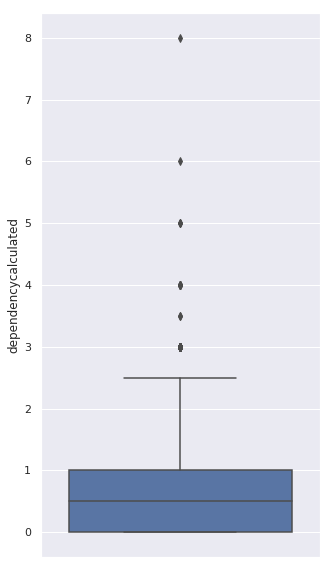

In [95]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='dependencycalculated')

In [96]:
Q1 = _ds_jef.dependencycalculated.quantile(1/4)
Q3 = _ds_jef.dependencycalculated.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.dependencycalculated <= Q1 - 1.5*IQR) | (_ds_jef.dependencycalculated >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para dependencycalculated')

Bajo el criterio de 1.5 * IQR encontramos 67 outliers para dependencycalculated


In [97]:
_ds_jef[is_outlier].sort_values(by=['dependencycalculated']).dependencycalculated.value_counts().sort_index()

2.5    11
3.0    38
3.5     2
4.0     8
5.0     3
6.0     1
8.0     1
inf     3
Name: dependencycalculated, dtype: int64

Existen 3 casos en donde el valor da infinito, lo cual se da por haber dividido por 0 en el cálculo, es decir cuando hogar_adul = 0. Si bien son solo 3 registros y podrían eliminarse, sería importante investigar estos casos ya que, de no tratarse de un error, estos hogares deberían tratarse con particularidad por la imposibilidad económica que esta situación implica.

In [98]:
_ds_jef[_ds_jef['hogar_adul'] == 0][['hogar_nin','hogar_adul','hogar_mayor','dependencycalculated']]

,hogar_nin,hogar_adul,hogar_mayor,dependencycalculated
1291,1,0,0,inf
1841,2,0,0,inf
2049,2,0,0,inf


Para poder mantener el formato de la columna, eliminando los inf que imposibilitan la creación de muchos gráficos, pero a su vez NO perder estos casos que es importante identificar para investigar, decidimos ponerle un valor no real (-1), sabremos así que se trata de un caso particular.

In [99]:
_ds['dependencycalculated']=_ds['dependencycalculated'].replace(np.inf, -1)
_ds_jef['dependencycalculated']=_ds_jef['dependencycalculated'].replace(np.inf, -1)

Resumen
No se logró identificar el significado de los valores no numéricos por lo que, sabiendo el concepto de negocio que implica esta columna, se decide reemplazar por su cálculo, demostrando que en la mayoría de los casos el valor inicial y el calculado son iguales, confirmando así que el concepto es correcto.

#### edjefe, edjefa

In [100]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'edjefe']

,Variable_name,Variable_description
100,edjefe,"years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0"


In [101]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'edjefa']

,Variable_name,Variable_description
101,edjefa,"years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and ..."


In [102]:
_ds_jef['edjefe'].value_counts().sort_index()

10       34
11      218
12       40
13       35
14       71
15       95
16       44
17       64
18        6
19        5
2        59
20        2
21       11
3        91
4        44
5        65
6       533
7        72
8        74
9       133
no     1237
yes      40
Name: edjefe, dtype: int64

Si bien el concepto al que representa es del tipo numérico (continua) se ve que los datos son categóricos por tener valores del tipo "yes", "no". Analizamos estos casos para ver si podemos entender el significado.
Al ser ds_jef solo los registros de las entrevistas a los jefes de hogar, se espera que escolari coincida con edjefe o edjefa según si tiene un 1 en male o female respectivamente, por ello decidimos analizar estas variables citadas para entender el comportamiento.

In [103]:
_ds_jef[_ds_jef['edjefe']=='yes'].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
1     0       yes     no      1           40
dtype: int64

In [104]:
_ds_jef[_ds_jef['edjefe']=='no'].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
0     1       no      10      10           33
                      11      11          136
                      12      12           24
                      13      13           22
                      14      14           44
                      15      15           71
                      16      16           43
                      17      17           31
                      18      18            1
                      19      19            2
                      2       2            30
                      20      20            1
                      21      21            4
                      3       3            60
                      4       4            40
                      5       5            44
                      6       6           304
                      7       7            47
                      8       8            67
                      9       9            73
                      no      0          

In [105]:
_ds_jef[_ds_jef['edjefa']=='yes'].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
0     1       no      yes     1           25
dtype: int64

In [106]:
_ds_jef[_ds_jef['edjefa']=='no'].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
0     1       no      no      0            61
1     0       10      no      10           34
              11      no      11          218
              12      no      12           40
              13      no      13           35
              14      no      14           71
              15      no      15           95
              16      no      16           44
              17      no      17           64
              18      no      18            6
              19      no      19            5
              2       no      2            59
              20      no      20            2
              21      no      21           11
              3       no      3            91
              4       no      4            44
              5       no      5            65
              6       no      6           533
              7       no      7            72
              8       no      8            74
              9       no      9          

In [107]:
_ds_jef[_ds_jef['escolari']==0].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
0     1       no      no      0           61
1     0       no      no      0           74
dtype: int64

In [108]:
_ds_jef[_ds_jef['escolari']==1].groupby(['male','female','edjefe','edjefa','escolari']).size()

male  female  edjefe  edjefa  escolari
0     1       no      yes     1           25
1     0       yes     no      1           40
dtype: int64

In [109]:
_ds_jef.groupby(['edjefe', 'escolari']).size()

edjefe  escolari
10      10           34
11      11          218
12      12           40
13      13           35
14      14           71
15      15           95
16      16           44
17      17           64
18      18            6
19      19            5
2       2            59
20      20            2
21      21           11
3       3            91
4       4            44
5       5            65
6       6           533
7       7            72
8       8            74
9       9           133
no      0           135
        1            25
        2            30
        3            60
        4            40
        5            44
        6           304
        7            47
        8            67
        9            73
        10           33
        11          136
        12           24
        13           22
        14           44
        15           71
        16           43
        17           31
        18            1
        19            2
        20            1

In [110]:
_ds_jef.groupby(['edjefa', 'escolari']).size()

edjefa  escolari
10      10           33
11      11          136
12      12           24
13      13           22
14      14           44
15      15           71
16      16           43
17      17           31
18      18            1
19      19            2
2       2            30
20      20            1
21      21            4
3       3            60
4       4            40
5       5            44
6       6           304
7       7            47
8       8            67
9       9            73
no      0           135
        1            40
        2            59
        3            91
        4            44
        5            65
        6           533
        7            72
        8            74
        9           133
        10           34
        11          218
        12           40
        13           35
        14           71
        15           95
        16           44
        17           64
        18            6
        19            5
        20            2

In [111]:
_ds_jef.loc[_ds_jef.edjefe =='yes', 'edjefe'] = 1
_ds_jef.loc[_ds_jef.edjefa =='yes', 'edjefa'] = 1
_ds_jef.loc[(_ds_jef.edjefe =='no') & (_ds_jef.male == 1), 'edjefe'] = 0
_ds_jef.loc[(_ds_jef.edjefa =='no') & (_ds_jef.female == 1), 'edjefa'] = 0
_ds_jef.loc[(_ds_jef.edjefe =='no') & (_ds_jef.male == 0), 'edjefe'] = float('nan')
_ds_jef.loc[(_ds_jef.edjefa =='no') & (_ds_jef.female == 0), 'edjefa'] = float('nan')
_ds.loc[_ds.edjefe =='yes', 'edjefe'] = 1
_ds.loc[_ds.edjefa =='yes', 'edjefa'] = 1
_ds.loc[(_ds.edjefe =='no') & (_ds.male == 1), 'edjefe'] = 0
_ds.loc[(_ds.edjefa =='no') & (_ds.female == 1), 'edjefa'] = 0
_ds.loc[(_ds.edjefe =='no') & (_ds.male == 0), 'edjefe'] = float('nan')
_ds.loc[(_ds.edjefa =='no') & (_ds.female == 0), 'edjefa'] = float('nan')

Por tener valores nan el tipo de dato sigue siendo object:

In [112]:
_ds_jef['edjefe'].dtype

dtype('O')

Ahora que tenemos las reglas implementadas, podemos unificar columnas:

In [113]:
_ds_jef.loc[_ds_jef.male == 0, 'edjefe'] = _ds_jef['edjefa']
_ds_jef.loc[_ds_jef.female == 0, 'edjefa'] = _ds_jef['edjefe']
_ds.loc[_ds.male == 0, 'edjefe'] = _ds['edjefa']
_ds.loc[_ds.female == 0, 'edjefa'] = _ds['edjefe']

In [114]:
_ds_jef['edjefe'] = _ds_jef['edjefe'].astype(np.int64)
_ds_jef['edjefa'] = _ds_jef['edjefa'].astype(np.int64)
_ds['edjefe'] = _ds['edjefe'].astype(np.int64)
_ds['edjefa'] = _ds['edjefa'].astype(np.int64)

In [115]:
_ds_jef.groupby(['edjefe','edjefa','escolari']).size()

edjefe  edjefa  escolari
0       0       0           135
1       1       1            65
2       2       2            89
3       3       3           151
4       4       4            84
5       5       5           109
6       6       6           837
7       7       7           119
8       8       8           141
9       9       9           206
10      10      10           67
11      11      11          354
12      12      12           64
13      13      13           57
14      14      14          115
15      15      15          166
16      16      16           87
17      17      17           95
18      18      18            7
19      19      19            7
20      20      20            3
21      21      21           15
dtype: int64

In [116]:
_ds['edjef']=_ds['edjefe']
_ds_jef['edjef']=_ds_jef['edjefe']
_ds.drop(columns = 'edjefe', inplace = True)
_ds_jef.drop(columns = 'edjefe', inplace = True)
_ds.drop(columns = 'edjefa', inplace = True)
_ds_jef.drop(columns = 'edjefa', inplace = True)

In [117]:
_ds_jef['edjef'].dtype

dtype('int64')

Resumen: 
edjefe siempre que tiene algún valor numérico, este equivale a escolari (para el caso de los jefes de hogar). Cuando vale no, es porque el sexo es female o escolari es 0, y cuando vale si es porque escolari es 1. Igual es para edjefa pero intercambiando el sexo.
Dicho esto podemos convertirlas a numéricas bajo las siguientes reglas:
Si edjef@ = yes, reemplazar por 1
Si edjef@ = no, reemplazar por 0 si la variable corresponde con el sexo y por vacio si no corresponde.
0 es diferente de vacio. Se entiende que 0 sería que no tuvo escolaridad, y vacío que no aplica. Además teniendo la columna de sexo, estas columnas podrían unificarse en una sola.
No reemplazamos directamente los valores por escolari ya que esta columna es individual y edjef@ es del hogar, dicho reemplazo solo sería válido para nuestro dataset de parentesco = 1.
Al reemplazar por nan la columna sigue siendo del tipo object, es necesario quitar los nan, hacer la conversión, y luego volver a nan.

### 2. Campos `tamhog` y `hhsize`

In [118]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tamhog']

,Variable_name,Variable_description
17,tamhog,size of the household


In [119]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'hhsize']

,Variable_name,Variable_description
21,hhsize,household size


In [120]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tamviv']

,Variable_name,Variable_description
18,tamviv,number of persons living in the household


In [121]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'r4t3']

,Variable_name,Variable_description
16,r4t3,Total persons in the household


In [122]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'hogar_total']

,Variable_name,Variable_description
98,hogar_total,# of total individuals in the household


Considerando que sus definiciones son mu similares, sino iguales, consideraremos todas estas variables en la comparación, no solo las indicadas en el enunciado:

In [123]:
_ds.groupby(['tamhog','hhsize','tamviv','r4t3','hogar_total']).size()

tamhog  hhsize  tamviv  r4t3  hogar_total
1       1       1       1     1               355
                2       1     1                 5
                        2     1                 7
                3       1     1                 5
                        3     1                 1
                4       1     1                 6
                5       1     1                 3
                6       1     1                 3
                7       1     1                 1
2       2       2       2     2              1308
                3       2     2                 4
                        3     2                10
                4       2     2                 8
                        4     2                 2
                5       2     2                12
                        5     2                 2
                6       2     2                10
                7       2     2                 4
                8       2     2                 2
3       

In [124]:
# Comparamos si son iguales
_ds['tamhog'].equals(_ds['hhsize'])

True

In [125]:
# Comparamos si son iguales
_ds['tamhog'].equals(_ds['tamviv'])

False

In [126]:
# Comparamos si son iguales
_ds['tamhog'].equals(_ds['r4t3'])

False

In [127]:
# Comparamos si son iguales
_ds['tamhog'].equals(_ds['hogar_total'])

True

In [128]:
# Comparamos si son iguales
_ds['tamviv'].equals(_ds['r4t3'])

False

In [129]:
# Comparamos si son iguales
_ds['tamviv'].equals(_ds['hogar_total'])

False

In [130]:
# Comparamos si son iguales
_ds['r4t3'].equals(_ds['hogar_total'])

False

Cuando se da que lascolumnas son iguales podemos eliminar una de ellas:

In [131]:
_ds.drop(columns = 'tamhog', inplace = True)
_ds_jef.drop(columns = 'tamhog', inplace = True)
_ds.drop(columns = 'hogar_total', inplace = True)
_ds_jef.drop(columns = 'hogar_total', inplace = True)

Existe este mismo concepto de variables pero desglozado por sexo, podemos validar que la suma sea consistente con alguna de las columnas:

In [132]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'r4h3']

,Variable_name,Variable_description
10,r4h3,Total males in the household


In [133]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'r4m3']

,Variable_name,Variable_description
13,r4m3,Total females in the household


In [134]:
_ds.groupby(['hhsize','tamviv','r4t3',_ds.r4h3+_ds.r4m3]).size()

hhsize  tamviv  r4t3    
1       1       1     1      355
        2       1     1        5
                2     2        7
        3       1     1        5
                3     3        1
        4       1     1        6
        5       1     1        3
        6       1     1        3
        7       1     1        1
2       2       2     2     1308
        3       2     2        4
                3     3       10
        4       2     2        8
                4     4        2
        5       2     2       12
                5     5        2
        6       2     2       10
        7       2     2        4
        8       2     2        2
3       3       3     3     2186
        4       3     3        3
                4     4        6
        5       3     3       21
                5     5        3
        6       3     3       21
        7       3     3        6
        8       3     3        6
        10      3     3        6
4       4       4     4     2375
        5       4 

A simple vista podría parecer que siempre r4t3 es equivalente a la suma, la cual equivale a su vez siempre a hhsize ó tamviv. Además tamviv NUNCA es mejor a la suma.
Lo validaremos a continuación:

In [135]:
_ds['prov']=_ds.r4h3+_ds.r4m3

In [136]:
# Comparamos si son iguales
_ds['r4t3'].equals(_ds['prov'])

True

In [137]:
_ds[(_ds['hhsize']) != (_ds['prov'])]['tamviv'].equals(_ds[(_ds['hhsize']) != (_ds['prov'])]['prov'])

True

In [138]:
_ds[(_ds['tamviv']) != (_ds['prov'])]['hhsize'].equals(_ds[(_ds['tamviv']) != (_ds['prov'])]['prov'])

True

Resumen:
tamhog, hogar_total y hhsize son iguales, tamviv y r4t3 son diferentes tanto con las primeras como entre si. Para el caso de las columnas idénticas, puede eliminarse una de ellas.
En cuanto a la suma de r4h3 y r4m3, siempre va a ser igual a (hhsize ó a tamviv), y siempre va a ser igual a r4t3. Además tamviv NUNCA es mayor que la suma.

Destacando entonces que una vivienda es una construcción material conformada por uno o más hogares, y que un hogar es una unidad económica, la unidad de análisis presisamente, entonces podemos concluir en que:
Cuando hhsize = tamviv = r4t3 asumimos que la relacion hogar - vivienda es 1 a 1 (9251 registros).
Cuando hhsize = r4t3 <> tamviv, es decir que tamviv es mayor que r4t3, asumimos que hay más de un hogar dentro de una vivienda. (258 registros)
Cuando tamviv = r4t3 <> hhsize, no podemos asumir nada, no tiene lógica a nivel de negocio (48 registros).

tamviv es la cdad de personas que habitan la vivienda;
r4t3 y hhsize (y por ende la sumatoria también) es la cdad de personas que componen al hogar, aunque hay una diferencia de 48 entre ellos;

In [139]:
_ds.drop(columns = 'prov', inplace = True)

### 3. Renta Mensual: Outliers

Todas las viviendas:

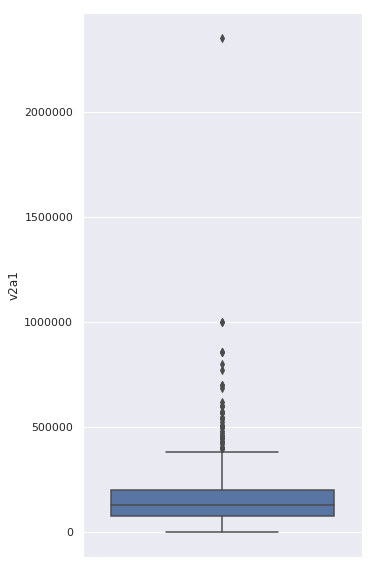

In [140]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef, y='v2a1')

In [141]:
Q1 = _ds_jef.v2a1.quantile(1/4)
Q3 = _ds_jef.v2a1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef.v2a1 <= Q1 - 1.5*IQR) | (_ds_jef.v2a1 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para v2a1')

Bajo el criterio de 1.5 * IQR encontramos 63 outliers para v2a1


In [142]:
_ds_jef[is_outlier].sort_values(by=['v2a1']).v2a1.value_counts().sort_index()

399378.0     4
400000.0     8
420000.0     1
427905.0     2
432000.0     1
450000.0     3
456432.0     5
470000.0     1
480000.0     1
500000.0     7
510000.0     1
525000.0     1
540000.0     1
542013.0     1
550000.0     1
564834.0     1
570540.0     7
600000.0     5
620000.0     1
684648.0     1
700000.0     2
770229.0     1
800000.0     1
855810.0     3
1000000.0    2
2353477.0    1
Name: v2a1, dtype: int64

Viviendas tipo "Rentadas":

In [143]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi3']

,Variable_name,Variable_description
116,tipovivi3,=1 rented


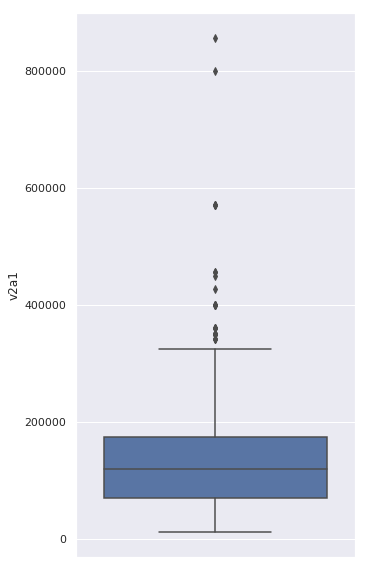

In [144]:
plt.figure(figsize=(5,10))
sns.set() 
g = sns.boxplot(data=_ds_jef[_ds_jef['tipovivi3']==1], y='v2a1')

In [145]:
Q1 = _ds_jef[_ds_jef['tipovivi3']==1].v2a1.quantile(1/4)
Q3 = _ds_jef[_ds_jef['tipovivi3']==1].v2a1.quantile(3/4)
IQR = Q3 - Q1

is_outlier = (_ds_jef[_ds_jef['tipovivi3']==1].v2a1 <= Q1 - 1.5*IQR) | (_ds_jef[_ds_jef['tipovivi3']==1].v2a1 >= Q3 + 1.5*IQR)
print('Bajo el criterio de 1.5 * IQR encontramos', sum(is_outlier), 'outliers para v2a1')

Bajo el criterio de 1.5 * IQR encontramos 30 outliers para v2a1


In [146]:
_ds_jef[_ds_jef['tipovivi3']==1][is_outlier].sort_values(by=['v2a1']).v2a1.value_counts().sort_index()

342324.0    3
350000.0    8
360000.0    4
399378.0    4
400000.0    1
427905.0    1
450000.0    1
456432.0    2
570540.0    4
800000.0    1
855810.0    1
Name: v2a1, dtype: int64

In [147]:
_ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1']!=np.nan)].groupby(['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']).size()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
0          0          1          0          0            537
           1          0          0          0            274
dtype: int64

Resumen:
Si bien los outliers no son grandes en cantidad si lo son en los montos que representan. Ahora el análisis que es de interés es analizar estos valores dentro de aquellos hogares que pagan una renta, por ello se repite el cálculo para las viviendas de tipo 3. Si bien es lógico que cambien los valorés típicos si acotamos el universo, el valor máximo debería seguir existiendo, independientemente de si calificado como outliers o no. El hecho de que no haya aparecido, demuestra que la columna v2a1 no siempre está ligada a tipovivi3. Como se observa tambien tipovivi2 tiene datos para v2a1, lo cual no es lógico según la definición de la variable.

### 4. Renta Mensual y Tipo de Vivienda

In [148]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi1']

,Variable_name,Variable_description
114,tipovivi1,=1 own and fully paid house


In [149]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi2']

,Variable_name,Variable_description
115,tipovivi2,"=1 own, paying in installments"


In [150]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi3']

,Variable_name,Variable_description
116,tipovivi3,=1 rented


In [151]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi4']

,Variable_name,Variable_description
117,tipovivi4,=1 precarious


In [152]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'tipovivi5']

,Variable_name,Variable_description
118,tipovivi5,"=1 other(assigned, borrowed)"


Comprobamos los tipo de vivienda para los casos en que v2a1 vale 0 o no tiene datos:

In [153]:
_ds_jef[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull())].groupby(['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']).size()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
0          0          0          0          1             254
                                 1          0              46
           1          0          0          0               6
1          0          0          0          0            1856
dtype: int64

Como era de esperarse no hay viviendas tipo 3 sin un alquiler asignado.

Se cumple que solo una columna a la vez tiene el valor 1, lo cual es correcto.
Respecto al significado

Comprobamos los tipo de vivienda para los casos en que v2a1 vale > 0 y tiene datos

In [154]:
_ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1'].notnull())].groupby(['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']).size()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
0          0          1          0          0            537
           1          0          0          0            274
dtype: int64

Como era de esperarse hay viviendas tipo 3 sin un alquiler asignado.
Respecto a vivienda tipo 2, en 274 hogares si tiene un valor y solo en 6 hogares no tiene un valor (hogares porque estamos usando el dataset ds_jef). Consideraremos estos 6 como un error de falta de dato y reemplazaremos por la media del alquiler para el caso de tipo 2, clasificando previamente por el target del hogar:

In [155]:
meat_target_1 = _ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1'].notnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==1)]['v2a1'].mean()
meat_target_2 = _ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1'].notnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==2)]['v2a1'].mean()
meat_target_3 = _ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1'].notnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==3)]['v2a1'].mean()
meat_target_4 = _ds_jef[(_ds_jef['v2a1']>0) & (_ds_jef['v2a1']!='') & (_ds_jef['v2a1'].notnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==4)]['v2a1'].mean()
meat_target_1 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==1)]['v2a1'].mean()
meat_target_2 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==2)]['v2a1'].mean()
meat_target_3 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==3)]['v2a1'].mean()
meat_target_4 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==4)]['v2a1'].mean()

In [156]:
_ds_jef.loc[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==1), 'v2a1'] = meat_target_1
_ds_jef.loc[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==2), 'v2a1'] = meat_target_2
_ds_jef.loc[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==3), 'v2a1'] = meat_target_3
_ds_jef.loc[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull()) & (_ds_jef['tipovivi2']==1) & (_ds_jef['Target']==4), 'v2a1'] = meat_target_4
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==1), 'v2a1'] = meat_target_1
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==2), 'v2a1'] = meat_target_2
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==3), 'v2a1'] = meat_target_3
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==4), 'v2a1'] = meat_target_4

Resumen:
Tipo vivienda 2 y 3 son los únicos que tienen una paga por lo que se esperaría que v2a1 tenga un doble significado según qué tipo de vivienda sea, cuota de la casa o alquiler respectivamente, es decir una oportunidad económiga del hogar. Como existen muy pocos casos de tipo vivienda 2 sin valor le ponemos un cálculo basado en la media para el tipo de vivienda dos desglozado por clasificación del hogar (target).

### 5. Renta Mensual: Valores Faltantes

In [157]:
_ds_jef[(_ds_jef['v2a1']==0) | (_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull())].groupby(['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']).size()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
0          0          0          0          1             254
                                 1          0              46
1          0          0          0          0            1856
dtype: int64

Reemplazamos los '' o nulos restantes (no tratados en el item anterior como vivienda 2) por 0:

In [158]:
_ds_jef.loc[(_ds_jef['v2a1']=='') | (_ds_jef['v2a1'].isnull()), 'v2a1'] = 0
_ds.loc[(_ds['v2a1']=='') | (_ds['v2a1'].isnull()), 'v2a1'] = 0

Resumen:
Como ya indicamos no existen valores faltantes para las viviendas catalogadas como rentadas. Para el caso de viviendas pagando a plazos como eran pocos datos los mismos fueron reemplazados por valores estadísticos calculados con los datos NO faltantes.

### 6. Datos Únicos por `idhogar`

En 2.5. Verificación de Consistencia de Datos ya hicimos este análisis, calificando previamente a las columnas por hogar/individuo. Reforzaremos este análisis para corroborar haber calificado correctamente. Vamos a repetir los cálculos incorporando variables al dataset de hogar para ver si aun hay duplicidad 0.
Con hogar nos referimos a las columnas que aportan una descripción del hogar justamente, por lo que se espera que su valor se repita para todas las entrevistas a personas de ese mismo hogar. Individual sin embargo caracteriza a la persona entrevistada representada en ese único registro.

In [159]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'meaneduc']

,Variable_name,Variable_description
102,meaneduc,average years of education for adults (18+)


Cambiamos la calificación de meaneduc de individuo a hogar:

In [160]:
cols = _ds.columns.str.extractall(r'^(Id|dis|estadocivil.|parentesco..?|instlevel.|escolari|rez_esc|f?e?male|age)$')
cols = cols[0].tolist()

In [161]:
_ds_hogar = _ds.drop(cols, axis=1)
print('Features del individuo:\t{}\nFeatures del hogar:\t{}'.format(
    _ds.columns.shape[0] - _ds_hogar.columns.shape[0],
    _ds_hogar.columns.shape[0]))

Features del individuo:	35
Features del hogar:	105


In [162]:
_ds_grouped =_ds_hogar.groupby(_ds_hogar.columns.tolist()).size().reset_index(name='count')

In [163]:
cant_dup =_ds_grouped[_ds_grouped.duplicated('idhogar',keep=False)].sort_values('idhogar').shape[0]
print('Cantidad de registros duplicados: {}'.format(cant_dup))

Cantidad de registros duplicados: 2161


Efetivamente meaneduc también es una descripción del hogar.

In [164]:
# Analizamos el significado del campo
_data_fields[_data_fields['Variable_name'] == 'dis']

,Variable_name,Variable_description
72,dis,=1 if disable person


Cambiamos la calificación de dis de individuo a hogar:

In [165]:
cols = _ds.columns.str.extractall(r'^(Id|estadocivil.|parentesco..?|instlevel.|escolari|rez_esc|f?e?male|age)$')
cols = cols[0].tolist()

In [166]:
_ds_hogar = _ds.drop(cols, axis=1)
print('Features del individuo:\t{}\nFeatures del hogar:\t{}'.format(
    _ds.columns.shape[0] - _ds_hogar.columns.shape[0],
    _ds_hogar.columns.shape[0]))

Features del individuo:	34
Features del hogar:	106


In [167]:
_ds_grouped =_ds_hogar.groupby(_ds_hogar.columns.tolist()).size().reset_index(name='count')

In [168]:
cant_dup =_ds_grouped[_ds_grouped.duplicated('idhogar',keep=False)].sort_values('idhogar').shape[0]
print('Cantidad de registros duplicados: {}'.format(cant_dup))

Cantidad de registros duplicados: 2162


Efetivamente dis es una descripción del individuo.

Resumen:
Tiene sentido tomar solo a las variables listadas debajo como individuales por ser justamente descripciones de una persona en particular y no del hogar como otras que describen a la vivienda o al jefe de hogar, sin importar si el registro es del jefe de hogar o de otro integrante.

In [169]:
cols = _ds.columns.str.extractall(r'^(Id|dis|estadocivil.|parentesco..?|instlevel.|escolari|rez_esc|f?e?male|age)$')
cols = cols[0].tolist()
print(cols)

['Id', 'escolari', 'rez_esc', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'age']


### 7. Individuos por Hogar

Contamos la cantidad de registros que hay en el dataset por cada idHogar, y llamamos a dicha cantidad hhsizecalculated.

In [170]:
_dsgroupidhogar = _ds['idhogar'].value_counts().sort_index()

In [171]:
_dsgroupidhogar

001ff74ca     2
003123ec2     4
004616164     2
004983866     2
005905417     3
006031de3     4
006555fe2     5
00693f597     4
006b64543     2
00941f1f4     4
009ae1cec     3
00e3e05c5     3
00e443b00     1
00edc0d0f     6
0108c62b8     6
013962b12     2
013e9ee6a     2
0172ab1d9     5
0194d569d     1
01c6fcb6e     1
01d2e2b0b     3
01ff6a086     2
020713493     1
023edfed0     3
0250e0b59     3
027651991     1
029f3d736     4
02a3da971     2
02ae50d8f     2
02e9bb4e7     3
02f34e26c     6
02ff93d1e     6
032d9f940     6
033c39c5c     4
035bb4b72     6
0369a5d78     3
039745cbe     3
03b23f2b1     4
03c6bdf85     2
03c78a7a9     4
03d27346e     3
03f00ec52     3
03f4e5f4d     3
043cef77c     2
045038655     1
0473832dd     4
047659c0f     2
048d64af0     2
04a032c94     2
04a8915f6     6
04b02301b     3
04b0f3f3a     3
04d0d0d8f     4
04d8420a2     3
0511912b6     4
0519a23f5     3
051f67b16     4
052da118c     1
053f09ebb     1
054074f61     6
0564f49cd     3
0566c116a     2
058a6080

In [172]:
_dsgroupidhogar = pd.DataFrame(_dsgroupidhogar)
_dsgroupidhogar.rename(columns = {'idhogar':'hhsizecalculated'}, inplace = True)
_dsgroupidhogar.index.names = ['idhogar']

Comparamos esta cantidad con las variables que representan a cantidad de personas por hogar:

In [173]:
_dsaux = _ds.merge(_dsgroupidhogar, on='idhogar')

In [174]:
_dsaux.groupby(['hhsize','hhsizecalculated','r4t3']).size()

hhsize  hhsizecalculated  r4t3
1       1                 1        378
                          2          7
                          3          1
2       1                 2          2
        2                 2       1346
                          3         10
                          4          2
                          5          2
3       1                 3          3
        2                 3          8
        3                 3       2238
                          4          6
                          5          3
4       1                 4          3
        2                 4          4
        3                 4         12
        4                 4       2420
                          5          8
                          7          4
5       1                 5          4
        2                 5          4
        3                 5          3
        4                 5          4
        5                 5       1570
                          6      

In [175]:
_dsaux2 = _dsaux[(_dsaux['hhsizecalculated']) != (_dsaux['hhsize'])][['idhogar','hhsize','hhsizecalculated','r4t3']]

In [176]:
_dsaux2.shape

(50, 4)

In [177]:
_dsaux3 = _dsaux[(_dsaux['hhsizecalculated']) != (_dsaux['r4t3'])][['idhogar','hhsize','hhsizecalculated','r4t3']]

In [178]:
_dsaux3.shape

(98, 4)

Resumen:
La cdad de entrevistados no siempre coincide con el tamaño del hogar, sin embargo existen más coincidencias con hhsize que con r4t3. Si observamos la distribución de edades vemos que existen registros con edades muy pequeñas, por lo que NO podemos asumir que las entrevistas faltantes sean de personas no capaces de responder. Como ya hemos validado en otra ocasión, para el caso de variables de hogar todos los registros tienen el mismo valor, por lo que no es una opción tomar un promedio como valor válido, o la respuesta del jefe de hogar.
Por ser solo 50 registros podríamos descartarlos, aunque otra opción es tomar como válida la variable original hhsize, pensando en que al ser el cálculo siempre menor podría esperarse que falten registros para algunos hogar, lo cual es más lógico a que respondieran erróneamente con valores mayor al cálculo. 

In [179]:
del _dsaux
del _dsaux2
del _dsaux3

### 8. `rooms` y `bedrooms`

In [180]:
_dsaux = _ds[(_ds['rooms']) < (_ds['bedrooms'])][['idhogar','rooms','bedrooms']]

In [181]:
_dsaux.shape

(0, 3)

Resumen:
No existen registros en donde haya más dormitorios que habitaciones, como era de esperarse.

In [182]:
del _dsaux

### 9. Jef@s de Hogar por `idhogar`

In [183]:
_ds['idhogar'].describe()

count          9557
unique         2988
top       fd8a6d014
freq             13
Name: idhogar, dtype: object

In [184]:
_ds_jef['idhogar'].describe()

count          2973
unique         2973
top       99cd26cee
freq              1
Name: idhogar, dtype: object

In [185]:
_dsaux = pd.merge(_ds, _ds_jef, how='left', on='idhogar')

In [186]:
_dsaux.shape

(9557, 284)

Existen 15 (2988 - 2973) hogares sin jefe de hogar identificado.

In [187]:
_dsaux[_dsaux['Id_y'].isnull()]['idhogar'].unique()

array(['09b195e7a', '896fe6d3e', '61c10e099', '374ca5a19', 'bfd5067c2',
       '1367ab31d', '6b1b2405f', 'f2bfa75c4', '03c6bdf85', 'ad687ad89',
       'b1f4d89d7', 'c0c8a5013', 'a0812ef17', 'd363d9183', '1bc617b23'],
      dtype=object)

In [188]:
_dsaux[_dsaux['Id_y'].isnull()][['idhogar','hhsize_x','age_x']]

,idhogar,hhsize_x,age_x
4935,09b195e7a,4,34
4975,896fe6d3e,4,16
5391,61c10e099,3,20
5396,374ca5a19,5,10
6443,bfd5067c2,4,7
6444,bfd5067c2,4,13
7086,1367ab31d,5,19
7438,6b1b2405f,4,43
7439,6b1b2405f,4,14
7440,6b1b2405f,4,32


In [189]:
_dsaux[_dsaux['Id_y'].isnull()][['idhogar','edjef_x','parentesco2_x','parentesco3_x','parentesco4_x','parentesco5_x','parentesco6_x','parentesco7_x','parentesco8_x','parentesco9_x','parentesco10_x','parentesco11_x','parentesco12_x']]

,idhogar,edjef_x,parentesco2_x,parentesco3_x,parentesco4_x,parentesco5_x,parentesco6_x,parentesco7_x,parentesco8_x,parentesco9_x,parentesco10_x,parentesco11_x,parentesco12_x
4935,09b195e7a,0,1,0,0,0,0,0,0,0,0,0,0
4975,896fe6d3e,0,0,1,0,0,0,0,0,0,0,0,0
5391,61c10e099,0,0,1,0,0,0,0,0,0,0,0,0
5396,374ca5a19,6,0,1,0,0,0,0,0,0,0,0,0
6443,bfd5067c2,3,0,1,0,0,0,0,0,0,0,0,0
6444,bfd5067c2,0,0,1,0,0,0,0,0,0,0,0,0
7086,1367ab31d,0,0,1,0,0,0,0,0,0,0,0,0
7438,6b1b2405f,0,1,0,0,0,0,0,0,0,0,0,0
7439,6b1b2405f,0,0,1,0,0,0,0,0,0,0,0,0
7440,6b1b2405f,0,0,1,0,0,0,0,0,0,0,0,0


Si observamos algunas características de los hogares sin jefes:
Edad, hay personas con edad adulta suficiente para asumir un rol de jefe de hogar;
Parentesco_x, en todo caso han respendido tener algún (1) parentesco con el supuesto jefe de hogar;

Resumen:
Existen 15 hogares sin jefe de hogar, sin embargo se observan valores en las columnas que describen a un jefe de hogar, como son la educación o el parentesco que el entrevistado en cuestión tiene con el jefe. Por ello podemos asumir que se trata de un error. En todos los registros hay una columna de parentesco con 1, por lo que NO podemos deducir que quien no tiene parentesco con el jefe es porque es el jefe.
Por ser solo 15 hogares se podrían descartar. No es posible deducir el dato.
Lo que podría haber sucedido, analizando el origen del dataset, es que al momento de dividir los registros en train y test no tuvieron en cuenta de dejar todos los registros de un hogar en un mismo dataset, por lo que NO es que falten sino que no fueron disponibilizados para el ejercicio.

### 10. Adicional

In [199]:
url_data = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data)

##Rutina de curacion

#Reducción del dataset
for col in _ds.columns:
    _ds_reduced[col]= pd.to_numeric(_ds[col],downcast='unsigned',errors='ignore')
#Completar NaN    
_ds['v2a1'] = _ds['v2a1'].fillna(0)
_ds['v18q1'] = _ds['v18q1'].fillna(0)
_ds['rez_esc'] = _ds['rez_esc'].fillna(0)
_ds['meaneduc'] = _ds['meaneduc'].fillna(0)



Reordenar variables
ind_cols = ['Id','female','age', 'male','dis','estadocivil1', 'estadocivil2',
            'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6',
            'estadocivil7','parentesco1', 'parentesco2', 'parentesco3',
            'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7',
            'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11',
            'parentesco12','escolari','rez_esc','meaneduc','instlevel1', 
            'instlevel2','instlevel3', 'instlevel4', 'instlevel5', 'instlevel6',
            'instlevel7', 'instlevel8', 'instlevel9','SQBescolari', 'SQBage', 
            'SQBhogar_total', 'SQBedjefe','SQBhogar_nin', 'SQBovercrowding', 
            'SQBdependency', 'SQBmeaned','agesq']
habitantes_cols = ['v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3',
                   'r4t1', 'r4t2', 'r4t3','tamviv','dependency','edjefe', 'edjefa']
hogar_cols = ['idhogar','v2a1', 'hogar_nin', 'hogar_adul',
               'hogar_mayor', 'hogar_total','hacdor', 'rooms', 'hacapo', 'v14a', 'refrig','tamhog',
               'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
               'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
               'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
               'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
               'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
               'abastaguano','public', 'planpri', 'noelec', 'coopele',
               'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
               'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
               'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
               'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2',
               'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2',
               'eviv3','bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2',
               'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television',
               'mobilephone', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3',
               'lugar4', 'lugar5', 'lugar6', 'area1', 'area2','Target']
_ds = _ds[ind_cols + habitantes_cols + hogar_cols]

#Eliminamos variables consideradas irrelevantes
def get_categorical_cols(col_regx):
    return _ds.columns.str.extractall(r'^({})$'.format(col_regx))[0].values.tolist()
cols = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe','SQBhogar_nin', 
        'SQBovercrowding','SQBdependency', 'SQBmeaned','agesq']
dropped_cols = []
for col in cols:
    dropped_cols += get_categorical_cols(col)
_ds.drop(dropped_cols,axis=1)

#Se renombran las variables
_col_dict = {'v2a1': 'Renta',
             'age': 'Edad',
             'escolari': 'Edad',
             'rez_esc': 'Edad',
             'meaneduc': 'Edad',
             'hacdor': 'Exceso_habitaciones',
             'rooms': 'Habitaciones',
             'v14a': 'Tiene_baño',
             'tamhog': 'Tamaño_hogar_tamhog',
             'hhsize': 'Tamaño_hogar_hhsize',
             'v18q': 'Tiene_tablet',
             'v18q1': 'Cant_tablets',
             'r4h1': 'Cant_hom_menores_12',
             'r4h2': 'Cant_hom_mayores_12',
             'r4h3': 'Total_hombres',
             'r4m1': 'Cant_muj_menores_12',
             'r4m2': 'Cant_muj_mayores_12',
             'r4m3': 'Total_mujeres',
             'r4t1': 'Cant_indiv_menores_12',
             'r4t2': 'Cant_indiv_mayores_12',
             'r4t3': 'Total_indiv',
             'tamviv': 'Tamaño_vivienda',
             'dependency': 'Cant_habitantes',
             'edjefe': 'Educ_jefe',
             'edjefa': 'Educ_jefa',
             'hacapo': 'Exceso_ambientes',
             'v14a': 'Tiene_baño',
             'public': 'Electridad_publica',
             'planpri': 'Electridad_privada',
             'noelec': 'Electridad_no_tiene',
             'coopele': 'Electridad_cooperativa',
             'overcrowding': 'Indiv_x_ambientes',
             'computer': 'Tiene_pc',
             'television': 'Tiene_tv',
             'mobilephone': 'Tiene_cel',
             'qmobilephone': 'Cant_cel'             
            }

_ds.rename(columns=_col_dict).head()


##Análisis en Profundidad del Contenido
##Features Tipo Objetos
#dependency
_ds['dependencycalculated'] = _ds[['hogar_nin','hogar_mayor']].sum(axis=1).div(_ds['hogar_adul'])
_ds.drop(columns = 'dependency', inplace = True)
_ds['dependencycalculated']=_ds['dependencycalculated'].replace(np.inf, -1)
#edjef_x
_ds.loc[_ds.edjefe =='yes', 'edjefe'] = 1
_ds.loc[_ds.edjefa =='yes', 'edjefa'] = 1
_ds.loc[(_ds.edjefe =='no') & (_ds.male == 1), 'edjefe'] = 0
_ds.loc[(_ds.edjefa =='no') & (_ds.female == 1), 'edjefa'] = 0
_ds.loc[(_ds.edjefe =='no') & (_ds.male == 0), 'edjefe'] = float('nan')
_ds.loc[(_ds.edjefa =='no') & (_ds.female == 0), 'edjefa'] = float('nan')
_ds.loc[_ds.male == 0, 'edjefe'] = _ds['edjefa']
_ds.loc[_ds.female == 0, 'edjefa'] = _ds['edjefe']
_ds['edjefe'] = _ds['edjefe'].astype(np.int64)
_ds['edjefa'] = _ds['edjefa'].astype(np.int64)
_ds['edjef']=_ds['edjefe']
_ds.drop(columns = 'edjefe', inplace = True)
_ds.drop(columns = 'edjefa', inplace = True)
##Campos tamhog y hhsize
_ds.drop(columns = 'tamhog', inplace = True)
_ds.drop(columns = 'hogar_total', inplace = True)
##Renta Mensual y Tipo de Vivienda
meat_target_1 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==1)]['v2a1'].mean()
meat_target_2 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==2)]['v2a1'].mean()
meat_target_3 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==3)]['v2a1'].mean()
meat_target_4 = _ds[(_ds['v2a1']>0) & (_ds['v2a1']!='') & (_ds['v2a1'].notnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==4)]['v2a1'].mean()
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==1), 'v2a1'] = meat_target_1
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==2), 'v2a1'] = meat_target_2
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==3), 'v2a1'] = meat_target_3
_ds.loc[(_ds['v2a1']==0) | (_ds['v2a1']=='') | (_ds['v2a1'].isnull()) & (_ds['tipovivi2']==1) & (_ds['Target']==4), 'v2a1'] = meat_target_4
_ds.loc[(_ds['v2a1']=='') | (_ds['v2a1'].isnull()), 'v2a1'] = 0


_ds.to_csv('./PobrezaCostaRica_depurado.csv')

0        True
1        True
2       False
5        True
8        True
12       True
13      False
18      False
20       True
21       True
23       True
26      False
27       True
30       True
33      False
39      False
40      False
43      False
45      False
49      False
53       True
56       True
58      False
59       True
61      False
64      False
68       True
72      False
74       True
77       True
80       True
84       True
86      False
91      False
92      False
95       True
98       True
102     False
106     False
107     False
108     False
109     False
112      True
119     False
124     False
128     False
132      True
134     False
139      True
141      True
142     False
153     False
157      True
165     False
171     False
174     False
182     False
183     False
184     False
193     False
197     False
200     False
202     False
204     False
208      True
210      True
213     False
215     False
218     False
223     False
225      True
226   